<a href="https://colab.research.google.com/github/theluminoous/DE/blob/main/DE_Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/RT_IOT2022.csv')
data


,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,76.0,8.444444,13.115936,0.0,23.0,32.0,6.4,9.555103,0.0,33.0,108.0,7.714286,11.618477,761.985779,2.972918e+07,3.201160e+07,4.001450e+06,1.040307e+07,4438.877106,1.511694e+06,2.026391e+06,506597.757339,680406.147126,761.985779,2.972918e+07,3.201160e+07,2.462431e+06,8.199747e+06,3.373777,3.0,1.666667,25.333333,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,2.282415e+06,2.282415e+06,2.282415e+06,2.282415e+06,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,76.0,8.444444,13.115936,0.0,23.0,32.0,6.4,9.555103,0.0,33.0,108.0,7.714286,11.618477,247.001648,2.985528e+07,3.188358e+07,3.985448e+06,1.046346e+07,4214.048386,1.576436e+06,1.876261e+06,469065.248966,741351.686212,247.001648,2.985528e+07,3.188358e+07,2.452583e+06,8.242459e+06,3.387323,3.0,1.666667,25.333333,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,2.028307e+06,2.028307e+06,2.028307e+06,2.028307e+06,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,74.0,8.222222,12.852799,0.0,21.0,30.0,6.0,8.689074,0.0,33.0,104.0,7.428571,11.229866,283.956528,2.984215e+07,3.212405e+07,4.015507e+06,1.044238e+07,2456.903458,1.476049e+06,2.013770e+06,503442.466259,660344.360027,283.956528,2.984215e+07,3.212405e+07,2.471081e+06,8.230593e+06,3.237450,3.0,1.666667,24.666667,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.281904e+06,2.281904e+06,2.281904e+06,2.281904e+06,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,74.0,8.222222,12.852799,0.0,21.0,30.0,6.0,8.689074,0.0,33.0,104.0,7.428571,11.229866,288.963318,2.991377e+07,3.196106e+07,3.995133e+06,1.048253e+07,3933.906555,1.551892e+06,1.883784e+06,470946.013927,724569.317911,288.963318,2.991377e+07,3.196106e+07,2.458543e+06,8.257786e+06,3.253959,3.0,1.666667,24.666667,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.047288e+06,2.047288e+06,2.047288e+06,2.047288e+06,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,0.438839,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0.0,33.0,76.0,8.444444,13.115936,0.0,23.0,32.0,6.4,9.555103,0.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
id.orig_p,0
id.resp_p,0
proto,0
service,0
...,...
idle.std,0
fwd_init_window_size,0
bwd_init_window_size,0
fwd_last_window_size,0


data.columns


In [ ]:
le = LabelEncoder()
for col in data.columns:
  data[col] = le.fit_transform(data[col])

In [ ]:
data


,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38611,429,1,5,12900,9,5,3,3,2556,1841,2496,25,59,4,5,33,4,7,0,2,1,3,3,13,0,0,0,0,0,20,59,34,35,0,3,3,17,26,0,20,58,36,50,962,9218,9207,9244,7598,3007,10326,11965,12919,7228,850,13130,13299,13707,13949,2701,115,66,39,11,0,0,0,0,0,0,14769,14454,14390,14886,0,2425,2278,1996,2328,0,16,40,10,3
1,1,51087,429,1,5,12668,9,5,3,3,2748,2010,2696,25,59,4,5,33,4,7,0,2,1,3,3,13,0,0,0,0,0,20,59,34,35,0,3,3,17,26,0,20,58,36,50,444,9495,8975,9011,7884,2956,11469,8995,12229,8363,475,13413,13067,13491,14227,2867,115,66,39,11,0,0,0,0,0,0,11980,11621,11558,12065,0,2700,2561,2270,2605,0,16,40,10,3
2,2,44705,429,1,5,13141,9,5,3,3,2358,1668,2294,25,59,4,5,33,4,7,0,2,1,3,3,13,0,0,0,0,0,20,57,31,31,0,1,1,15,21,0,20,56,32,40,516,9476,9448,9486,7818,2119,9579,11682,12824,6344,547,13391,13540,13949,14178,2343,115,66,36,9,0,0,0,0,0,0,14761,14446,14381,14878,0,2681,2539,2251,2586,0,16,40,10,3
3,3,60835,429,1,5,12779,9,5,3,3,2655,1928,2597,25,59,4,5,33,4,7,0,2,1,3,3,13,0,0,0,0,0,20,57,31,31,0,1,1,15,21,0,20,56,32,40,526,9669,9086,9123,8009,2758,10928,9109,12276,8222,556,13586,13178,13596,14357,2398,115,66,36,9,0,0,0,0,0,0,12251,11899,11832,12344,0,2868,2734,2439,2776,0,16,40,10,3
4,4,51031,429,1,5,12679,9,5,3,3,2738,1999,2684,25,59,4,5,33,4,7,0,2,1,3,3,13,0,0,0,0,0,20,59,34,35,0,3,3,17,26,0,20,58,36,50,662,9442,8986,9022,7823,2282,12671,10321,12512,8608,677,13359,13078,13502,14177,2858,115,66,39,11,0,0,0,0,0,0,13159,12816,12747,13254,0,2650,2507,2220,2553,0,16,40,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,2005,59189,1790,1,0,6,1,1,0,0,15879,15417,16100,212,3,2,2,3,2,2,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,11,0,0,5,10,0,0,0,0,0,0,0,0,11,11,11,11,0,0,0,0,0,0,6,0,37,9
123113,2006,59189,1802,1,0,7,1,1,0,0,15877,15415,16098,212,3,2,2,3,2,2,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,13,13,13,0,0,5,10,0,0,0,0,0,0,0,0,13,13,13,13,0,0,0,0,0,0,6,0,37,9
123114,2007,59189,1803,1,0,6,1,1,0,0,15879,15417,16100,212,3,2,2,3,2,2,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,11,0,0,5,10,0,0,0,0,0,0,0,0,11,11,11,11,0,0,0,0,0,0,6,0,37,9
123115,2008,59189,1805,1,0,6,1,1,0,0,15879,15417,16100,212,3,2,2,3,2,2,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,11,0,0,5,10,0,0,0,0,0,0,0,0,11,11,11,

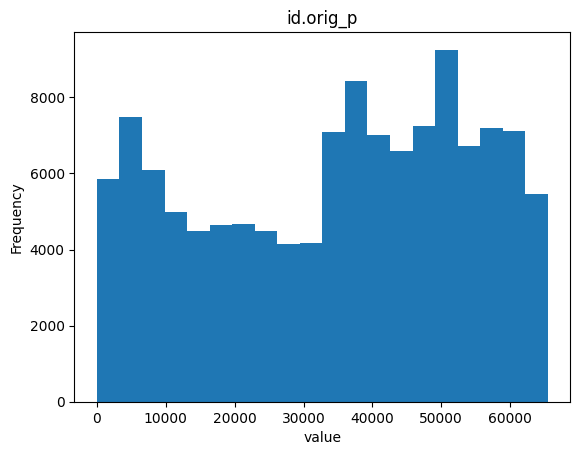

In [ ]:
data['id.orig_p'].plot(kind='hist',bins = 20)
plt.title('id.orig_p')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

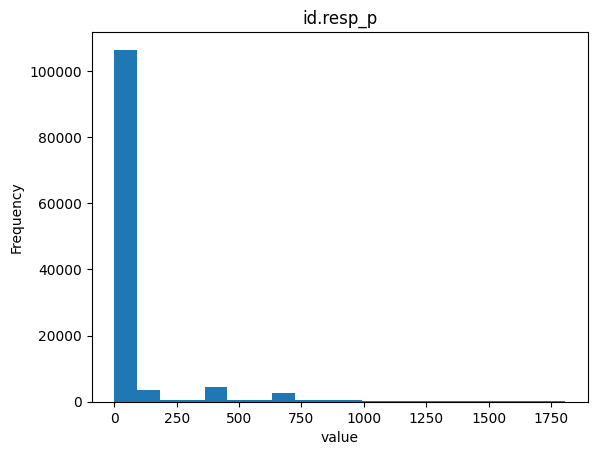

In [ ]:
data['id.resp_p'].plot(kind='hist',bins = 20)
plt.title('id.resp_p')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

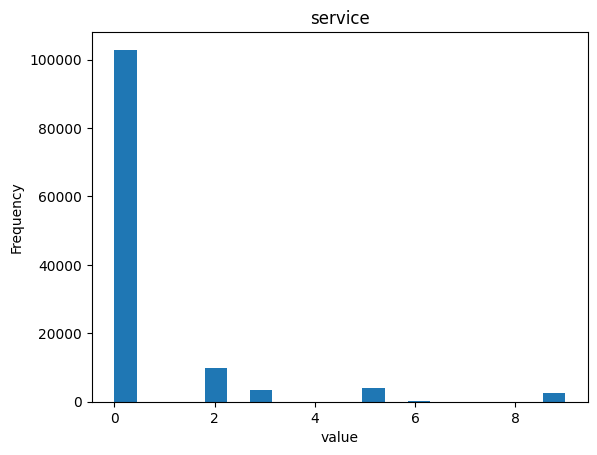

In [ ]:
data['service'].plot(kind='hist',bins = 20)
plt.title('service')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

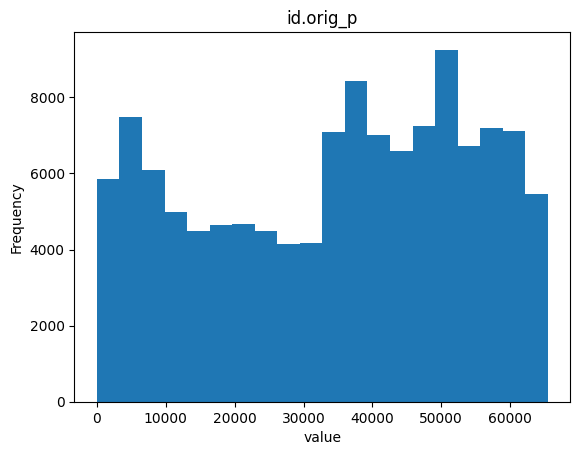

In [ ]:
data['id.orig_p'].plot(kind='hist',bins = 20)
plt.title('id.orig_p')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled

array([[-1.2159004 ,  0.21039841,  1.37166167, ...,  3.09815525,
         0.48523622,  0.08276416],
       [-1.21586757,  0.86541643,  1.37166167, ...,  3.09815525,
         0.48523622,  0.08276416],
       [-1.21583474,  0.53034709,  1.37166167, ...,  3.09815525,
         0.48523622,  0.08276416],
       ...,
       [-1.15000851,  1.29078963,  6.93810978, ..., -0.2994321 ,
         2.61078209,  2.51990234],
       [-1.14997568,  1.29078963,  6.94621232, ..., -0.2994321 ,
         2.61078209,  2.51990234],
       [-1.14994285,  1.29078963,  6.95431487, ..., -0.2994321 ,
         2.61078209,  2.51990234]])

In [ ]:
data_train, data_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

In [ ]:
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(data_train)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
y_pred = model.predict(data_test)

In [ ]:
y_pred

array([ 1,  1,  1, ...,  1, -1,  1])

In [ ]:
y_pred = [ 1 if x == 1 else 0 for x in y_pred]

In [ ]:
y_pred

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [ ]:
y_test = [1]*len(y_pred)

In [ ]:
y_test


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95     24624

    accuracy                           0.90     24624
   macro avg       0.50      0.45      0.47     24624
weighted avg       1.00      0.90      0.95     24624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))


[[    0     0]
 [ 2552 22072]]
